# Coding Exercises (Part 2)

### Exercise 11: Cleaning messy Data

## Full Data Workflow A-Z: Cleaning Data

Now, you will have the opportunity to analyze your own dataset. <br>
__Follow the instructions__ and insert your code! You are either requested to 
- Complete the Code and __Fill in the gaps__. Gaps are marked with "__---__" and are __placeholders__ for your code fragment. 
- Write Code completely __on your own__ 

In some exercises, you will find questions that can only be answered, if your code is correct and returns the right output! The correct answer is provided below your coding cell. There you can check whether your code is correct.

If you need a hint, check the __Hints Section__ at the end of this Notebook. Exercises and Hints are numerated accordingly.

If you need some further help or if you want to check your code, you can also check the __solutions notebook__.

### Have Fun!

--------------------------------------------------------------------------------------------------------------

## Option 1: Self_guided

__Import__ the cars dataset from the csv-file __cars_unclean.csv__ and inspect. Then, __clean up__ the dataset:

- Identify and handle __inconsistent data__
- Each column/feature should have the __appropriate/most functional datatype__
- Identify and handle __missing values__
- Identify and handle __duplicates__
- Have a closer look into columns with __strings__ and clean up
- Identify and handle __erroneous outliers__ in numerical columns
(hint: there might be a "fat finger" issue in one column and some value(s) in the mpg column could be in "gallons per mile" units)
- __Save and export__ the cleaned dataset in a new csv-file (cars_clean.csv)
- Change the datatype of appropriate columns to __categorical__.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

In [94]:
plt.rcdefaults()

In [95]:
cars_unclean = pd.read_csv("cars_unclean.csv")

In [96]:
cars_unclean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           329 non-null    float64
 1   cylinders     329 non-null    int64  
 2   displacement  329 non-null    float64
 3   horsepower    329 non-null    object 
 4   weight        329 non-null    int64  
 5   acceleration  329 non-null    float64
 6   model year    329 non-null    int64  
 7   origin        329 non-null    object 
 8   name          329 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 23.3+ KB


In [97]:
cars_unclean.describe()

,mpg,cylinders,displacement,weight,acceleration,model year
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,21.655199,5.802432,217.004559,3229.082067,15.400000,104.495441
std,7.294651,1.719825,104.719009,1376.306985,2.922756,232.498690
min,0.060606,4.000000,68.000000,1800.000000,8.000000,70.000000
25%,16.000000,4.000000,121.000000,2464.000000,13.500000,73.000000
50%,20.200000,6.000000,200.000000,3102.000000,15.400000,76.000000
75%,26.000000,8.000000,305.000000,3821.000000,17.000000,79.000000
max,44.300000,8.000000,455.000000,23000.000000,24.800000,1973.000000


In [98]:
cars_unclean.describe(include= "O")

,horsepower,origin,name
count,329,329,329
unique,86,3,242
top,150.0 hp,usa,amc matador
freq,22,254,6


In [99]:
cars_unclean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0 hp,3504,12.0,70,United States,chevrolet chevelle malibu
1,15.0,8,350.0,165.0 hp,3693,11.5,70,United States,buick skylark 320
2,18.0,8,318.0,150.0 hp,3436,11.0,70,United States,plymouth satellite
3,16.0,8,304.0,150.0 hp,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0 hp,3449,10.5,70,usa,FORD TORINO


## TO DO: Zastąpić brakujace horespower średnią z danej grupy

In [100]:
horsepower_to_drop = cars_unclean.horsepower.str.contains("Not")
horsepower_to_drop = horsepower_to_drop[horsepower_to_drop].index

In [101]:
horsepower_to_drop

Int64Index([28, 111, 276, 279, 290, 304], dtype='int64')

In [102]:
#cars_unclean.drop(index= horsepower_to_drop, inplace= True)

In [103]:
cars_unclean.loc[horsepower_to_drop, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
28,25.0,4,98.0,Not available hp,2046,19.0,71,usa,ford pinto
111,21.0,6,200.0,Not available hp,2875,17.0,74,usa,ford maverick
276,40.9,4,85.0,Not available hp,1835,17.3,80,europe,renault lecar deluxe
279,23.6,4,140.0,Not available hp,2905,14.3,80,usa,ford mustang cobra
290,34.5,4,100.0,Not available hp,2320,15.8,81,europe,renault 18i
304,23.0,4,151.0,Not available hp,3035,20.5,82,usa,amc concord dl


In [104]:
cars_unclean.loc[horsepower_to_drop, "horsepower"] = np.nan

In [105]:
cars_unclean.loc[horsepower_to_drop, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
28,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
111,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
276,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
279,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
290,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
304,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [106]:
cars_unclean.horsepower = pd.to_numeric(cars_unclean.horsepower.str.split(" ",n =1,  expand= True)[0])

In [107]:
cars_unclean.horsepower.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  46.,  87.,  90., 113., 200., 210., 193.,  nan,
       100., 105.,  88., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        60.,  80.,  54., 208., 155., 112.,  69., 145., 137., 158., 167.,
       107., 230.,  49.,  75.,  91.,  83.,  67.,  78., 148., 129.,  71.,
        98., 115.,  81.,  92.,  79., 120., 152.,  52., 102.,  58.,  96.,
       149.,  89.,  63.,  48.,  66., 139.,  68., 103., 125., 133., 138.,
       135., 142.,  77.,  62.,  84.,  64.,  65.,  74.,  82.])

In [108]:
cars_unclean.origin.value_counts()

usa              254
europe            72
United States      3
Name: origin, dtype: int64

In [109]:
cars_unclean.origin = cars_unclean.origin.str.replace(pat= "United States", repl= "usa")

In [110]:
cars_unclean.origin = cars_unclean.origin.astype("category")

In [111]:
plt.rcdefaults()

<AxesSubplot: >

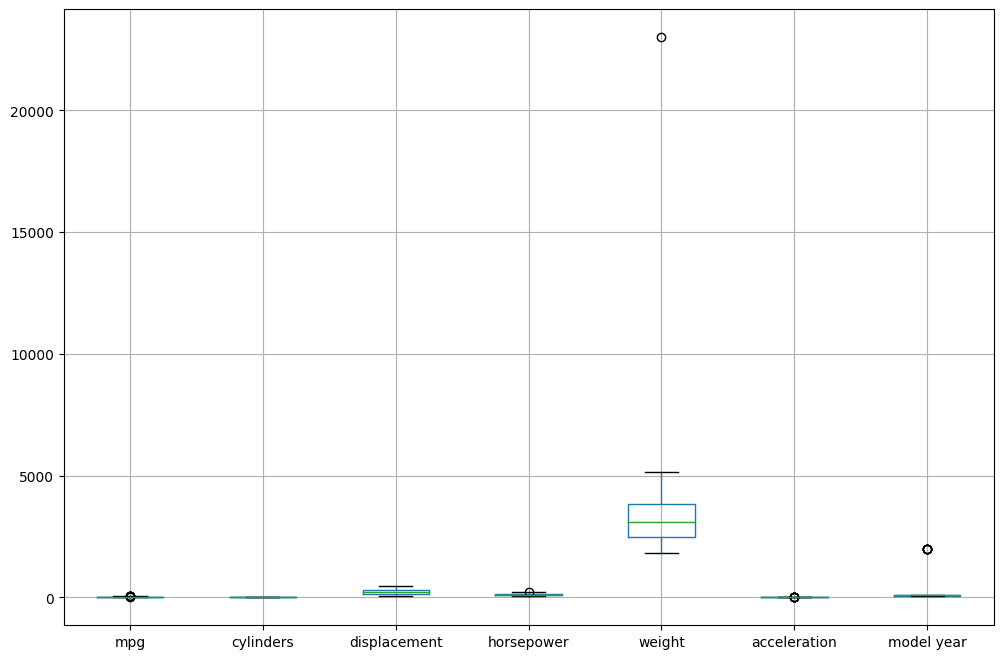

In [112]:
cars_unclean.boxplot(figsize= (12, 8))

mpg                AxesSubplot(0.125,0.11;0.0945122x0.77)
cylinders       AxesSubplot(0.238415,0.11;0.0945122x0.77)
displacement    AxesSubplot(0.351829,0.11;0.0945122x0.77)
horsepower      AxesSubplot(0.465244,0.11;0.0945122x0.77)
weight          AxesSubplot(0.578659,0.11;0.0945122x0.77)
acceleration    AxesSubplot(0.692073,0.11;0.0945122x0.77)
model year      AxesSubplot(0.805488,0.11;0.0945122x0.77)
dtype: object

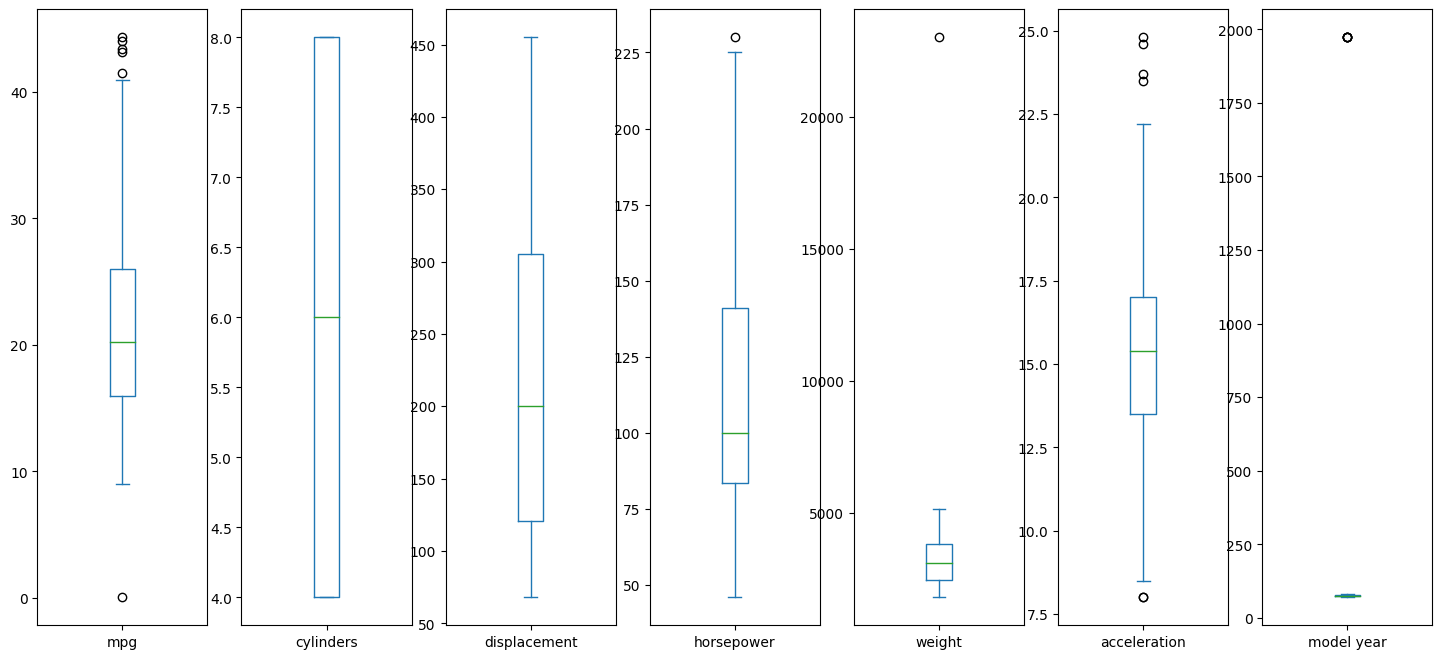

In [113]:
cars_unclean.plot(kind ="box", subplots= True, figsize= (18, 8))

In [114]:
cars_unclean.loc[126, "weight"] = cars_unclean.loc[126, "weight"] / 10

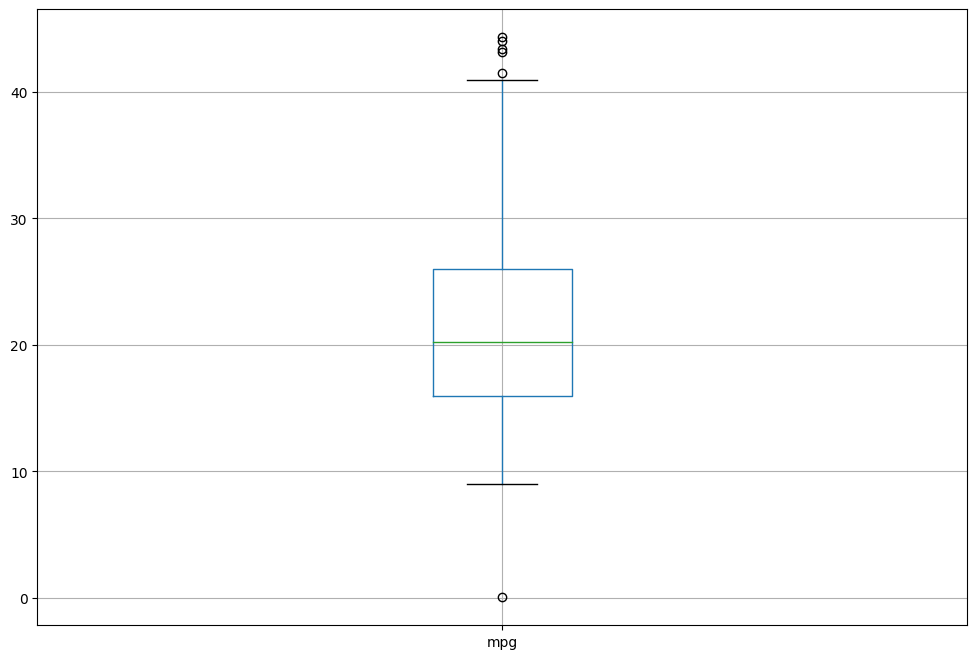

In [115]:
plt.figure(figsize= (12, 8))
cars_unclean.boxplot("mpg")
plt.show()

--------------------------

In [116]:
cars_unclean.mpg.nlargest(5)

272    44.3
315    44.0
273    43.4
209    43.1
264    41.5
Name: mpg, dtype: float64

In [117]:
cars_unclean.mpg.nsmallest(5)

244     0.060606
26      9.000000
23     10.000000
24     10.000000
25     11.000000
Name: mpg, dtype: float64

In [118]:
cars_unclean.loc[244, :]

mpg                             0.060606
cylinders                              8
displacement                       351.0
horsepower                         138.0
weight                              3955
acceleration                        13.2
model year                            79
origin                               usa
name              mercury grand marquis 
Name: 244, dtype: object

In [119]:
cars_unclean.loc[240:247, :]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
240,20.200000,6,232.0,90.0,3265,18.2,79,usa,amc concord dl 6
241,20.600000,6,225.0,110.0,3360,16.6,79,usa,dodge aspen 6
242,17.000000,8,305.0,130.0,3840,15.4,79,usa,chevrolet caprice classic
243,17.600000,8,302.0,129.0,3725,13.4,79,usa,ford ltd landau
244,0.060606,8,351.0,138.0,3955,13.2,79,usa,mercury grand marquis
245,18.200000,8,318.0,135.0,3830,15.2,79,usa,dodge st. regis
246,16.900000,8,350.0,155.0,4360,14.9,79,usa,buick estate wagon (sw)
247,15.500000,8,351.0,142.0,4054,14.3,79,usa,ford country squire (sw)


In [120]:
mercury_mean = round(cars_unclean[cars_unclean.name.str.contains("mercury")].mpg.mean())
mercury_mean

18

In [121]:
cars_unclean.loc[244, "mpg"] = mercury_mean

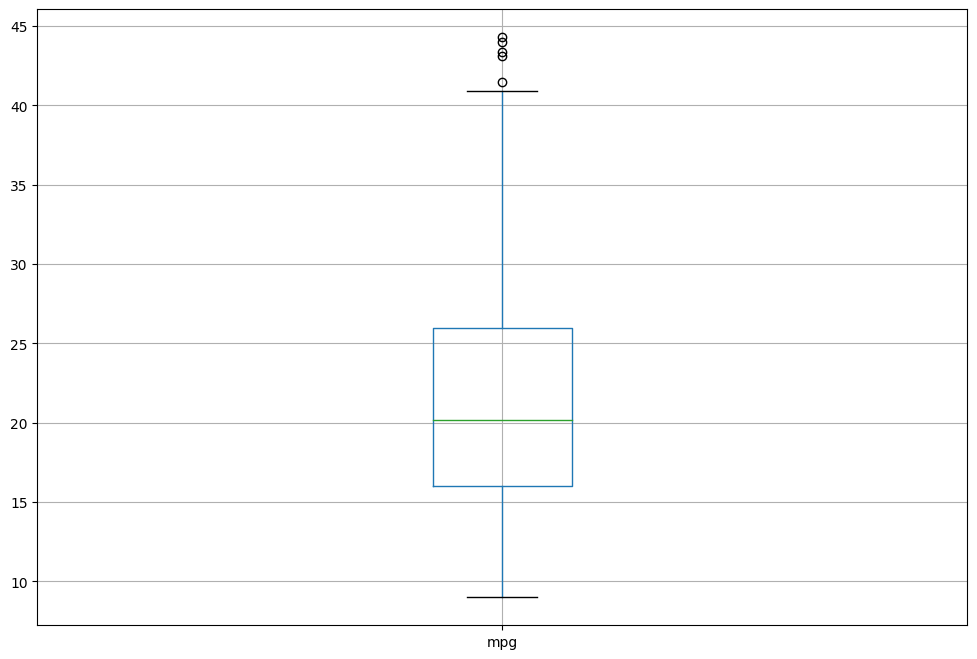

In [122]:
plt.figure(figsize= (12, 8))
cars_unclean.boxplot("mpg")
plt.show()

In [123]:
cars_unclean.rename(columns= {"model year": "model_year"}, inplace= True)

In [124]:
cars_unclean.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

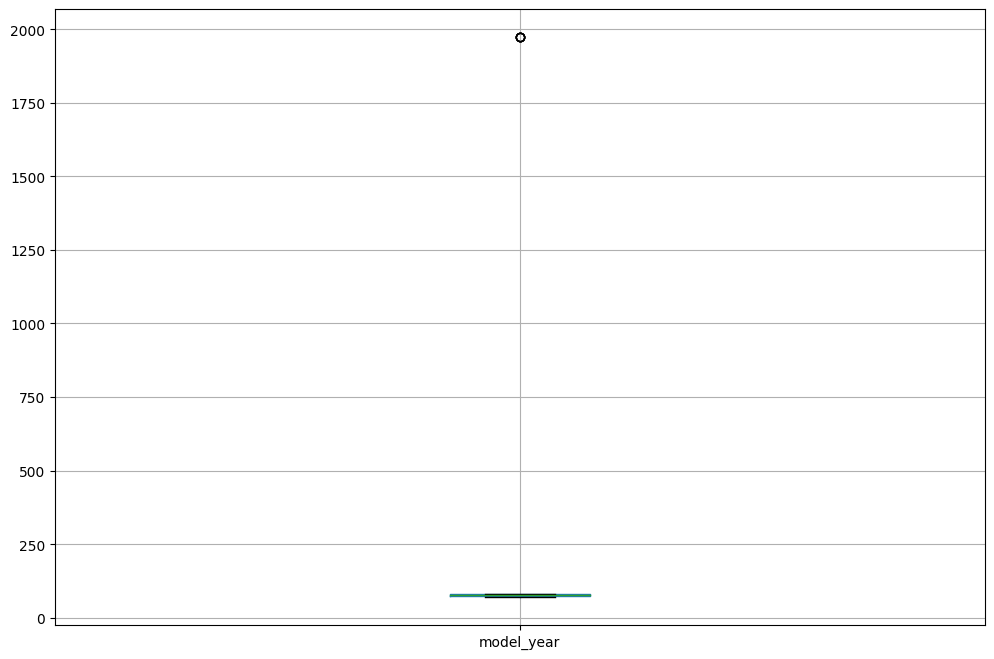

In [125]:
plt.figure(figsize= (12, 8))
cars_unclean.boxplot("model_year")
plt.show()

In [126]:
cars_unclean.loc[cars_unclean.model_year < 1900, "model_year"] = cars_unclean.model_year + 1900

In [127]:
cars_unclean.model_year.value_counts()

1973    38
1976    32
1970    29
1978    28
1979    27
1975    26
1971    25
1972    23
1982    23
1974    22
1977    22
1980    17
1981    17
Name: model_year, dtype: int64

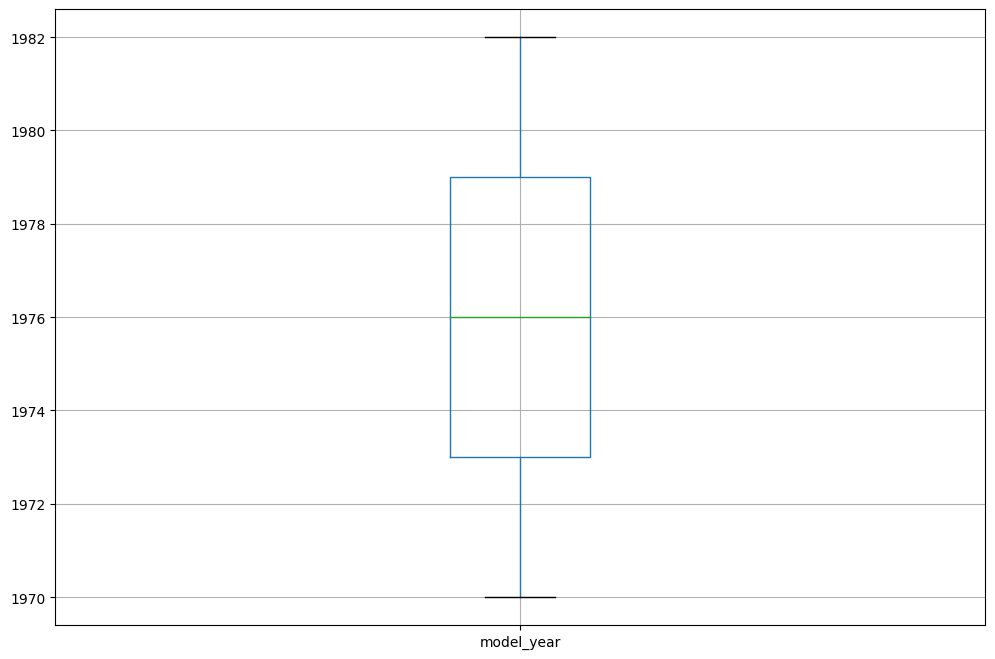

In [128]:
plt.figure(figsize= (12, 8))
cars_unclean.boxplot("model_year")
plt.show()

In [129]:
cars_unclean.isna().sum(axis = 0)

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [130]:
cars_unclean[cars_unclean.duplicated(keep= False)].sort_values("name")

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
323,24.3,4,151.0,90.0,3003,20.1,1980,usa,amc concord
268,24.3,4,151.0,90.0,3003,20.1,1980,usa,amc concord
322,16.0,6,258.0,110.0,3632,18.0,1974,usa,amc matador
117,16.0,6,258.0,110.0,3632,18.0,1974,usa,amc matador
308,25.0,6,181.0,110.0,2945,16.4,1982,usa,buick century limited
328,25.0,6,181.0,110.0,2945,16.4,1982,usa,buick century limited
31,17.0,6,250.0,100.0,3329,15.5,1971,usa,chevrolet chevelle malibu
326,17.0,6,250.0,100.0,3329,15.5,1971,usa,chevrolet chevelle malibu
165,14.5,8,351.0,152.0,4215,12.8,1976,usa,ford gran torino
327,14.5,8,351.0,152.0,4215,12.8,1976,usa,ford gran torino


In [131]:
cars_unclean.duplicated(keep= "first")

0      False
1      False
2      False
3      False
4      False
       ...  
324     True
325     True
326     True
327     True
328     True
Length: 329, dtype: bool

In [65]:
duplicated_to_drop = cars_unclean.duplicated(keep= "first")
duplicated_to_drop = duplicated_to_drop[duplicated_to_drop].index

In [66]:
cars_unclean.drop(index= duplicated_to_drop, inplace= True)

In [67]:
cars_clean = cars_unclean

In [68]:
cars_clean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,1970,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,1970,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,1970,usa,FORD TORINO


## Option 2: Guided and Instructed

# STOP HERE, IF YOU WANT TO DO THE EXERCISE ON YOUR OWN!

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [ ]:
# run the cell!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# run the cell!
cars = pd.read_csv("cars_unclean.csv")

__Inspect__ the DataFrame and identify obviously __inconsistent data__!

In [ ]:
# run the cell!
cars.head(20)

In [ ]:
# run the cell!
cars.tail(10)

In [ ]:
# run the cell! 
cars.info()

85. __Identify__ one __column label__ that should be changed and adjust/__rename__ the column label! __Fill in the gaps__!

In [ ]:
cars.---(columns = {--- : ---}, inplace = True)

86. Have a closer look to the __origin__ column by analyzing the __frequency/count__ of unique values! Can you find __any inconsistency__?

There are the values ... usa and United States

87. __Replace__ the value __"United States"__ in the origin column! __Save__ the change!

Inspect and __identify__ the __problem__ in the column __horsepower__!

In [ ]:
# run the cell!
cars.horsepower.head()

Datatype should be ... numerical. But first of all, we need to remove...?

88. Apply the appropriate __string operation__ to __remove "hp"__ from the horsepower column! Pay attention to __whitespaces__! __Overwrite__ the horsepower column!

In [ ]:
# run the cell and inspect!
cars.head()

Run and inspect, anything __strange__?

In [ ]:
# run the cell!
cars.horsepower.value_counts()

There are 6 entries with the value ... "Not available"

89. Create __"real" missing values__ in the column horsepower! __Save__ the change! __Fill in the gaps__!

In [ ]:
cars.horsepower.---("Not available", ---, inplace = True)

90. Now you can __convert the datatype__ in the column __horsepower__! __Overwrite__ the column!

Inspect!

In [ ]:
# run the cell!
cars.info()

In [ ]:
# run the cell!
cars.head(7)

Any __inconsistencies__ in the column __name__? Inspect one element! 

In [ ]:
#run the cell!
cars.loc[4, "name"]

It seems like some names are uppercase, while others are lowercase. And there are some excess whitespaces in the strings.

91. __Convert__ all names to __lowercase__ and __remove all whitespaces__ on the left ends and right ends! __Overwrite!__

Run the next two cells and identify (erroneous) outliers in the numercial columns!

In [ ]:
# run the cell!
cars.describe()

In [ ]:
# run the cell!
cars.plot(subplots = True, figsize = (15,12))
plt.show()

92. Inspect the column __model_year__ in more detail by analyzing the __frequency/counts__ of unique values! Anything __strange__?

There are 5 entries with ... 1973 instead of 73. 

93. __Replace__ the value __1973__! __Save__ the change!

94. Inspect the column __weight__ by __sorting__ the values from __high to low__. Can you see the __extreme value__?

The by far highest value is ... 23000 lbs. Must be an error!

95. __Select__ the complete __row__ of the outlier with the method __idxmax()__!

It´s an opel manta ... could be a "fat finger" problem, weight could be 2300 instead of 23000.


96. __Overwrite__ the erroneous outlier! __Fill in the gaps__!

In [ ]:
cars.loc[---, ---] = 2300

Inspect the column __mpg__! Any strange __outlier__?

In [ ]:
# run the cell!
cars.mpg.sort_values()

An mpg of ... 0.060606 cannot be correct...

97. __Select__ the complete __row__ of the outlier with the method __idxmin()__!

98. After some research we have found out that this extreme value is in __"gallons per mile"__ units instead of "miles per gallon". <br>
__Convert__ to __"miles per gallon"__ units! __Fill in the gaps__!

In [ ]:
cars.loc[---, ---] = ---/cars.loc[---, ---]

99. Next, select all __rows__ with at least one __missing__/na value! __Fill in the gaps__!

In [ ]:
cars.loc[cars.---.---]

There are 6 cars, where the horsepower is unknown.

100. As horsepower is an important feature in the cars dataset, we decide to remove all 6 rows. __Remove__ and __save__ the change!

Now let´s find __duplicates__. First, we need to understand __which columns__ we have to take into consideration to identify duplicates.

101. The first __naive assumption__ is that two cars cannot have the __same name__. Let´s count the number of __name-duplicates__. __Fill in the gaps__!

In [ ]:
cars.duplicated(--- = [---]).sum()

There are ... 86 potential duplicates to remove.

102. Let´s inspect the __duplicated pairs__ by selecting __all instances__ of a name duplicate! __Fill in the gaps__! <br>
Should the __name__ be the __only criteria__ to identify duplicates?

In [ ]:
cars.loc[cars.duplicated(--- = [---], --- = False)].sort_values("name")

No! Cars can have several vintages/model_year and several variants with different technical specifications (e.g. weight, horsepower)  

103. To be on the safe side, let´s include __all columns__ to identify duplicates. __Count__ the number of duplicates! __Fill in the gaps__!

In [ ]:
cars.---.---

There are ... 10 potential duplicates.

104. Let´s inspect the __duplicated pairs__ by selecting __all instances__ of a duplicate! __Fill in the gaps__!

In [ ]:
cars.loc[cars.duplicated(---)].sort_values("name")

All pairs seem to be real duplicates.

105. __Drop one instance__ of each duplicated pair! __Save__ the change!

In [ ]:
# run the cell
cars.head()

In [ ]:
# run the cell!
cars.info()

106. Our dataset seems to be pretty clean now! __Save__ and __export__ to a new csv-file (cars_clean.csv)! Do not export the RangeIndex!

Call the __describe()__ method on all __non-numerical columns__!

In [ ]:
# run the cell!
cars.describe(include = "O")

Are there any __categorical features__ (only few unique values) where the datatype could be __converted to "category"__? <br>
107. If so, __convert__ and __overwrite__ the column(s)!

__Inspect__. Did we __reduce memory usage__?

In [ ]:
#run the cell!
cars.info()

Yes, we reduced memory usage!

# Well Done!

-----------------------------------------

# Hints (Spoiler!)

85. rename() method, column "model year"

86. value_counts() method

87. replace() method

88. string(str) method replace(), " hp"

89. replace() method, np.nan

90. astype() method, "float"

91. string(str) methods lower() and strip()

92. value_counts() method

93. replace() method

94. sort_values() method

95. Filter cars with cars.weight.idxmax()

96. cars.weight.idxmax(), "weight"

97. Filter cars with cars.mpg.idxmin()

98. cars.mpg.idxmin(), "mpg", 1/x

99. methods isna() and any()

100. dropna() method

101. subset parameter, "name"

102. keep parameter

103. methods duplicated() and sum()

104. keep parameter

105. drop_duplicates() method

106. to_csv() method

107. astype() method